<h1>3장 Pandas로 데이터 가공하기</h1>

<h2>Pandas 시계열: 시간으로 인덱싱하기</h2>

In [77]:
import numpy as np
import pandas as pd

In [78]:
index = pd.DatetimeIndex(['2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01'])
data = pd.Series([0,1,2,3], index=index)
data

2018-05-01    0
2018-06-01    1
2018-07-01    2
2018-08-01    3
dtype: int64

In [79]:
data['2018-06-01':'2018-08-01']

2018-06-01    1
2018-07-01    2
2018-08-01    3
dtype: int64

In [80]:
data['2018']

2018-05-01    0
2018-06-01    1
2018-07-01    2
2018-08-01    3
dtype: int64

### Pandas 시계열 데이터 구조

In [81]:
import datetime as datetime

dates = pd.to_datetime([datetime.datetime(2018, 5, 31), '3th of July, 2018', '2018-jul-6', '05-03-2018','20180501'])
dates

DatetimeIndex(['2018-05-31', '2018-07-03', '2018-07-06', '2018-05-03',
               '2018-05-01'],
              dtype='datetime64[ns]', freq=None)

In [82]:
dates.to_period('D')

PeriodIndex(['2018-05-31', '2018-07-03', '2018-07-06', '2018-05-03',
             '2018-05-01'],
            dtype='period[D]', freq='D')

In [83]:
dates - dates[0]

TimedeltaIndex(['0 days', '33 days', '36 days', '-28 days', '-30 days'], dtype='timedelta64[ns]', freq=None)

#### 정규 시퀀스:pd.date_range()

In [84]:
pd.date_range('2017-05-31', '2017-06-07')

DatetimeIndex(['2017-05-31', '2017-06-01', '2017-06-02', '2017-06-03',
               '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07'],
              dtype='datetime64[ns]', freq='D')

In [85]:
pd.date_range('2018-05-31', periods=8)

DatetimeIndex(['2018-05-31', '2018-06-01', '2018-06-02', '2018-06-03',
               '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07'],
              dtype='datetime64[ns]', freq='D')

In [86]:
pd.date_range('2018-05-31', periods=8, freq='H')

DatetimeIndex(['2018-05-31 00:00:00', '2018-05-31 01:00:00',
               '2018-05-31 02:00:00', '2018-05-31 03:00:00',
               '2018-05-31 04:00:00', '2018-05-31 05:00:00',
               '2018-05-31 06:00:00', '2018-05-31 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [87]:
pd.period_range('2018-06', periods=8, freq='M')

PeriodIndex(['2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
             '2018-12', '2019-01'],
            dtype='period[M]', freq='M')

In [88]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### 주기와 오프셋

In [89]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [90]:
from pandas.tseries.offsets import BDay

pd.date_range('2018-07-01', periods=5, freq=BDay())

DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06'],
              dtype='datetime64[ns]', freq='B')

### 리샘플링, 시프팅, 윈도잉

In [91]:
from pandas_datareader import data

# goog = data.DataReader('GOOG', start='2004', end = '2016', data_source='google')
# good.head()

In [92]:
# goog = goog['Close']

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()


#### 리샘플링 및 주기 변경

In [94]:
# goog.plot(alpha=0.5, style='-')
# goog.ewsample('BA').mean().plot(style=':')
# goog.asfreq('BA').plot(style='--');
# plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

In [95]:
# fig, ax = plt.Subplot(2, sharex=True)
# data = goog.iloc[:10]

# data.asfreq('D').plot(ax=ax[0], marker='0')

# data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
# data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
# ax[1].legend(["back-fill", "forward-fill"])

#### 시간 이동(time-shift)

In [96]:
# fig, ax = plt.subplots(3, sharey=True)
# #데이터에 주기를 적용
# goog = goog.asfreq('D', method='pad')

# goog.plot(ax=ax[0])
# goog.plot(900).plot(ax=ax[1])
# goog.tshift(900).plot(ax=ax[2])

# #범례와 주석
# local_max = pd.to_datetime('2017-01-01')
# offset = pd.Timedelta(900, 'D')

# ax[0].legend(['input'], loc = 2)
# ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
# ax[0].axvline(local_max, alpha=0.3, color='red')

# ax[1].legend(['shift(900)'], loc = 2)
# ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
# ax[1].axvline(local_max + offset, alpha=0.3, color='red')

# ax[0].legend(['tshift(900)'], loc = 2)
# ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
# ax[0].axvline(local_max + offset, alpha=0.3, color='red')


In [97]:
# ROI = 100 * (goog.tshifr(-360)/goo -1)
# ROI.plot()
# plt.ylabel('%Return on Investment')

#### 롤링 윈도우(rolling windows)

In [98]:
# rolling = goog.rolling(365, center = True)

# datea = pd.DataFrame({'input': goog, 
#                      'one-year rolling_mean': rolling.mean(),
#                      'one_year rolling_std': rolling.std()})
# ax = data.plot(style=['-', '--', ':'])
# ax.lines[0].set_alpha(0.3)

### 추가 학습 자료

#### 예제: 시애틀 자전거 수 시각화

In [99]:
!curl -o Fremont_Bridge.csv

curl: no URL specified!
curl: try 'curl --help' or 'curl --manual' for more information


In [100]:
data = pd.read_csv('/Users/chosikc/Sites/PythonDataHandbook/Fremont_Bridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [101]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West+East')

In [102]:
data.dropna().describe()

,West,East,Total
count,49600.000000,49600.000000,49600.000000
mean,54.716230,55.895887,110.612117
std,73.001037,81.137001,140.092804
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


#### 데이터 시각화하기

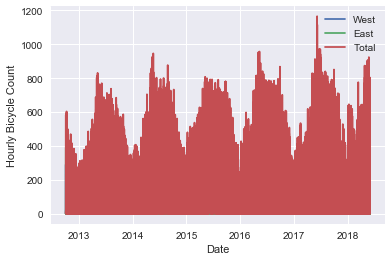

In [103]:
%matplotlib inline
import seaborn; seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0,0.5,'Weekly bicycle count')

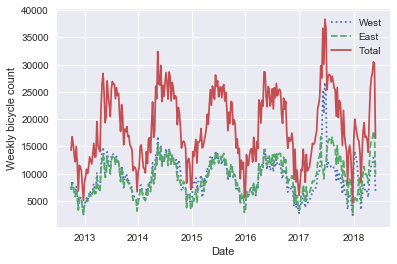

In [104]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0,0.5,'mean hourly count')

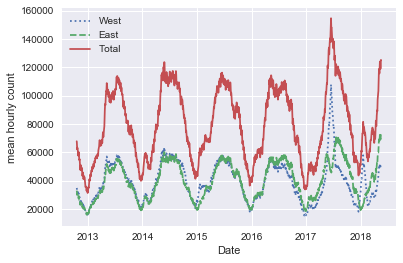

In [105]:
daily = data.resample('D').sum()
daily.rolling(30, center = True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

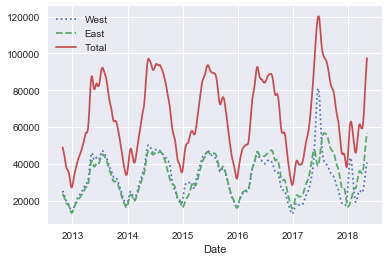

In [106]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

#### 데이터 파헤쳐 보기

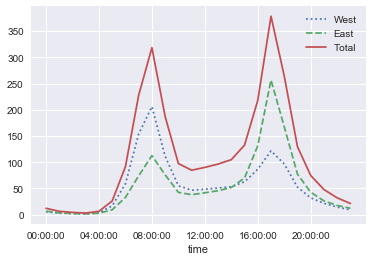

In [107]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style=[':', '--', '-']);

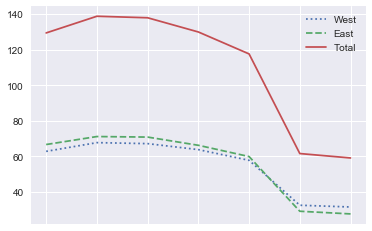

In [108]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [109]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

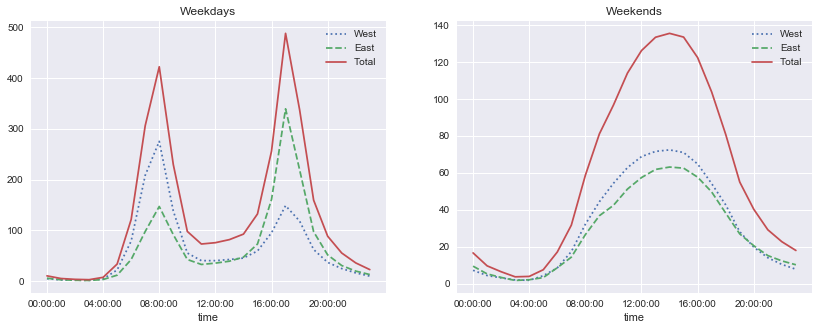

In [110]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':','--','-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':','--','-'])